In [1]:
import scipy.stats as sps
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Исходные три значения случайного вектора
my_vect = np.array([1, 0, 1, 0, 1, 5, 1, 1, 2]).reshape(3, 3).T
print(my_vect)

[[1 0 1]
 [0 1 1]
 [1 5 2]]


## а) Найти уравнение линейной регрессии 
## omega = a * ksi + b * eta

In [3]:

Psi_tran = my_vect[:2,:].copy()
print("Psi_tran = ")
print(Psi_tran)

Y = np.atleast_2d(my_vect[2]).T
print("Y = ")
print(Y)

F = np.dot(Psi_tran, Psi_tran.T)
F_rever = np.linalg.inv(F)

betta_sample = np.dot(np.dot(F_rever, Psi_tran), Y)
print("a = ", betta_sample[0], ", b = ", betta_sample[1])

print(" ")
print("Уравнение линейной регрессии: ")
print("omega = ",  np.round(betta_sample[0, 0], 3), "* ksi + ", np.round(betta_sample[1, 0], 3), "* eta")

Psi_tran = 
[[1 0 1]
 [0 1 1]]
Y = 
[[1]
 [5]
 [2]]
a =  [-0.33333333] , b =  [3.66666667]
 
Уравнение линейной регрессии: 
omega =  -0.333 * ksi +  3.667 * eta


## б) Найти уравнение ridge регрессии w = a * ksi + b * eta. Построить график CVSS и определить значение параметра регуляризации.


CVSS_MIN =  21.265098622222347
lamb0 =  1.5


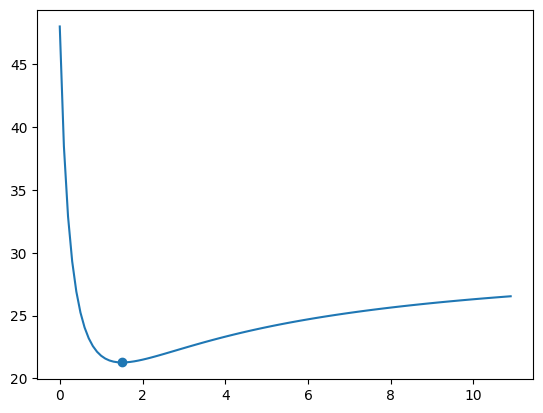

In [4]:
CVSS = np.array([])
lamb = np.arange(0, 11, 0.1)

CVSS_MIN = -1
lamb0_ridge = 0

def L(betta, Y_new, Psi_new, lamb_i):
    return sum([(Y_new[i] - Psi_new[i, 0] * betta[0] - Psi_new[i, 1] * betta[1])**2 for i in range(2)]) + lamb_i * (betta[0]**2 + betta[1]**2)

for lamb_i in lamb:
    CVSS_i = np.array([])
    for j in range(3):
        match j:
            case 0:
                Y_new = my_vect[2, 1:]
                Psi_new = my_vect[:2, 1:].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 0].T, solution.x) - my_vect[2, 0])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
            case 1:
                Y_new = my_vect[2, :3:2]
                Psi_new = my_vect[:2, :3:2].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 1].T, solution.x) - my_vect[2, 1])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
            case 2:
                Y_new = my_vect[2, :2]
                Psi_new = my_vect[:2, :2].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 2].T, solution.x) - my_vect[2, 2])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
                
    CVSS = np.append(CVSS, sum(CVSS_i))
    
    if (CVSS_MIN != -1 and sum(CVSS_i) < CVSS_MIN) or (CVSS_MIN == -1):
        CVSS_MIN = sum(CVSS_i)
        lamb0_ridge = lamb_i
        
    
plt.plot(lamb, CVSS)
plt.scatter(lamb0_ridge, CVSS_MIN)
print("CVSS_MIN = ", CVSS_MIN)
print("lamb0 = ", lamb0_ridge)

In [5]:
def L(betta1, Y1, Psi1, lamb01):
    return (sum((Y1 - np.dot(Psi1, betta1))**2) + lamb01 * sum(betta1**2))[0]

solution_ridge = opt.minimize(L, x0  = betta_sample[:, 0], args = (Y, Psi_tran.T, lamb0_ridge))
a_ridge = solution_ridge.x[0]
b_ridge = solution_ridge.x[1]

print("Уравнение линейной регрессии: ")
print("omega = ",  np.round(a_ridge, 3), "* ksi + ", np.round(b_ridge, 3), "* eta")



Уравнение линейной регрессии: 
omega =  1.778 * ksi +  -0.0 * eta


## в) Найти уравнение lasso регрессии w = a * ksi + b * eta. Построить график CVSS и определить значение параметра регуляризации

CVSS_MIN =  26.0000000060788
lamb0 =  6.0


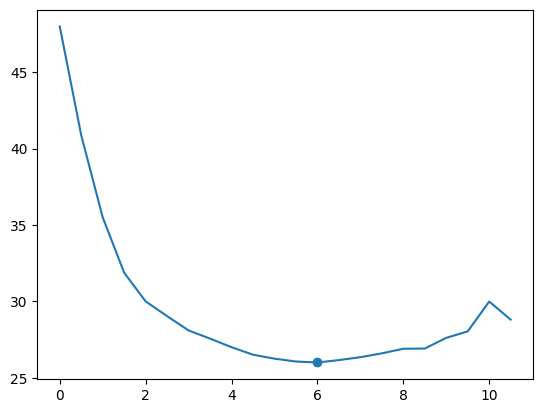

In [9]:
CVSS = np.array([])
lamb = np.arange(0, 11, 0.5)

CVSS_MIN = -1
lamb0_lasso = 0

def L(betta, Y_new, Psi_new, lamb_i):
    return sum([(Y_new[i] - Psi_new[i, 0] * betta[0] - Psi_new[i, 1] * betta[1])**2 for i in range(2)]) + lamb_i * (abs(betta[0]) + abs(betta[1]))

for lamb_i in lamb:
    CVSS_i = np.array([])
    for j in range(3):
        match j:
            case 0:
                Y_new = my_vect[2, 1:]
                Psi_new = my_vect[:2, 1:].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 0].T, solution.x) - my_vect[2, 0])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
            case 1:
                Y_new = my_vect[2, :3:2]
                Psi_new = my_vect[:2, :3:2].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 1].T, solution.x) - my_vect[2, 1])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
            case 2:
                Y_new = my_vect[2, :2]
                Psi_new = my_vect[:2, :2].T
                
                solution = opt.minimize(L, x0  = betta_sample[:,0], args = (Y_new, Psi_new, lamb_i))
                CVSS_j = (np.dot(my_vect[:2, 2].T, solution.x) - my_vect[2, 2])**2
                CVSS_i = np.append(CVSS_i, CVSS_j)
                
    CVSS = np.append(CVSS, sum(CVSS_i))
    
    if (CVSS_MIN != -1 and sum(CVSS_i) < CVSS_MIN) or (CVSS_MIN == -1):
        CVSS_MIN = sum(CVSS_i)
        lamb0_lasso = lamb_i
        
    
plt.plot(lamb, CVSS)
plt.scatter(lamb0_lasso, CVSS_MIN)
print("CVSS_MIN = ", CVSS_MIN)
print("lamb0 = ", lamb0_lasso)

In [10]:
def L(betta1, Y1, Psi1, lamb01):
    return (sum((Y1 - np.dot(Psi1, betta1))**2) + lamb01 * sum(abs(betta1)))[0]

solution_lasso = opt.minimize(L, x0  = betta_sample[:, 0], args = (Y, Psi_tran.T, lamb0_lasso))
a_lasso = solution_lasso.x[0]
b_lasso = solution_lasso.x[1]

print("Уравнение линейной регрессии: ")
print("omega = ",  np.round(a_lasso, 3), "* ksi + ", np.round(b_lasso, 3), "* eta")

Уравнение линейной регрессии: 
omega =  1.019 * ksi +  -0.0 * eta


## Таким образом, оба метода дали одинаковый вывод: 
## Второй фактор eta можно исключить и уравнение примет вид 
## omega = a * ksi